In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [16]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [17]:
init_notebook_mode(connected=True)
cf.go_offline()

In [18]:
df=pd.read_csv('RBDPALMSTEARIN.csv')

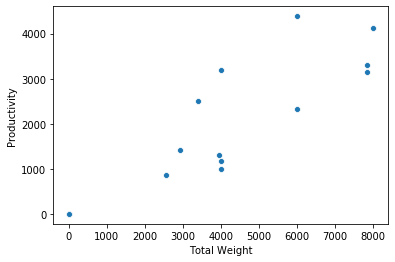

In [19]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [20]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0,14.0,14.0,14.000000,12.000000
mean,136.214286,193893.357143,2.345000,2.421429,4324.934357,0.043571,0.004357,0.0,0.0,0.0,2052.287857,34211.224917
std,92.138006,3595.299829,8.774187,9.060156,2596.826085,0.026197,0.002620,0.0,0.0,0.0,1435.068816,9872.127560
min,10.000000,190896.000000,0.000000,0.000000,-0.302000,0.000000,0.000000,0.0,0.0,0.0,-0.190000,17800.000000
25%,51.750000,191777.250000,0.000000,0.000000,3055.046750,0.030000,0.003000,0.0,0.0,0.0,1039.952500,31025.424750
50%,154.000000,192625.000000,0.000000,0.000000,3999.737500,0.040000,0.004000,0.0,0.0,0.0,1875.575000,33279.500000
75%,197.750000,192985.750000,0.000000,0.000000,5999.752000,0.060000,0.006000,0.0,0.0,0.0,3185.842500,44099.250000
max,326.000000,200855.000000,32.830000,33.900000,7999.443000,0.080000,0.008000,0.0,0.0,0.0,4385.670000,45286.000000


In [21]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [22]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(lm.intercept_)

108.87336452902287


In [24]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.443583


In [25]:
predictions = lm.predict(X_test)

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 283.5538268353944
MSE: 110896.4623196283
RMSE: 333.011204495627
r2_score: 0.9738122188135298


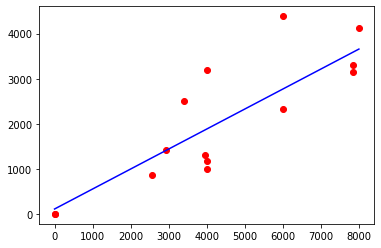

In [27]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [28]:
joblib.dump(lm,"RBD_Palm_Stearin.pkl")

['RBD_Palm_Stearin.pkl']